Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MEDICINA - modeli širenja epidemije
## 07.04.2020. 

# Luka Simić, 2019/0368

***
<font color='red'>
Preimenovati svesku: File/Rename u __medicina_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb)
</font>

***

#### __Zadatak 1__: SIR model
Deterministički SIR model epidemije je predstavljen sistemom diferencijalnih jednačina prvog reda koje opisuju odgovarajuće kompartmane: 

\begin{align}
    \frac{dS}{dt} &= - \alpha SI\\
    \frac{dI}{dt} &= \alpha SI - \beta I\\
    \frac{dR}{dt} &= \beta I
\end{align}

gde je $S$ broj jedinki podložnih oboljevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije i $\beta$ konstanta brzine oporavka.

Na početku epidemije 100 jedinki zaraženih virusom SARS-CoV-2 ulazi u izolovanu podložnu populaciju od $10^6$ jedinki. Konstante brzine koje definišu širenje virusa su $\alpha = 2.25\times 10^{-6}$ i $\beta = 1$ i definišu se na nedeljnoj (sedmičnoj) bazi. 

a) Forimirati Python definiciju (<font color='blue'>SIR</font>) koja opsiuje navedeni sistem diferencijalnih jednačina i zadati joj pozivne parametre $\alpha$ i $\beta$ kao argumente. 

Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $25$ nedelja (dovoljno je u $2000$ tačaka) sa početnim uslovima koji su naznačeni u opisu početka epidemije. Nacrtati zavisnosti $S(t)$ (plavom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Koliko nedelja je potrebno da epidemija dostigne svoj maksimum? Koliko iznosi maksimalni broj zaraženih jedinki za date parametre? Koliko vremena mora proteći da bi samo $0.5\%$ populacije ostalo zaraženo? Za nalaženje maskimuma koristiti neku od ugrađenih Python funkcija. 

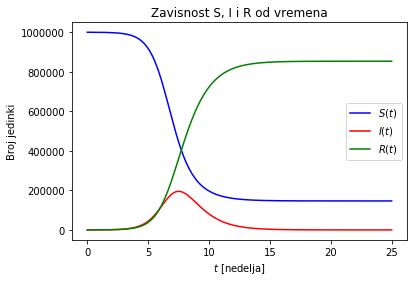

Max: 7.5
Max species: 195186.5465321757
Min: 14.3625


In [94]:
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import numpy as np

def SIR(y, t, alpha, beta):
    S, I, R = y
    return [-alpha * S * I, alpha * S * I - beta * I, beta * I]

t = np.linspace(0, 25, 2000)
alpha = 2.25e-6
beta = 1
N = 1e6

integrisano = odeint(SIR, [N - 100, 100, 0], t, (alpha, beta))
transponovano = np.transpose(integrisano)
plt.title('Zavisnost S, I i R od vremena')
plt.xlabel('$t$ [nedelja]')
plt.ylabel('Broj jedinki')
plt.plot(t, transponovano[0], label='$S(t)$', color='blue')
plt.plot(t, transponovano[1], label='$I(t)$', color='red')
plt.plot(t, transponovano[2], label='$R(t)$', color='green')
plt.legend()
plt.show()

apsolutno = np.abs(transponovano[1] - 0.005 * N)
max = np.where(apsolutno == np.max(apsolutno))[0][0]
min = np.where(apsolutno[max:] == np.min(apsolutno[max:]))[0][0]
print('Max:', max / 2000 * 25)
print('Max species:', np.max(transponovano[1]))
print('Min:', (min + max) / 2000 * 25)

1. Potrebno je 7.5 nedelja kako bi epidemija dostigla svoj maksimum.
2. Maksimalni broj zaraženih jedniki iznosi 195187.
3. Potrebno je 14.3625 nedelja kako bi samo $0.5%$ populacije ostalo zaraženo.

b) Ilustrovati i komentarisati evoluciju epidemije počevši od stanja potpune podložnosti populacije za tri različita slučaja koji oslikavaju karakteristične opsege osnovnog reprodukcionog broja ($R_{0} < 1, R_{0} = 1, R_{0} > 1$). Rešiti sistem diferencijalnih jednačina. Domen rešavanja prilagoditi dinamici evolucije epidemije. Nacrtati krive evolucije epidemije $S(t)$ (plavom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku za pojedinačne slučajeve. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Svakoj slici pridružiti odgovarajuću vrednost osnovnog reprodukcionog broja kao naslov grafika. Za koje vrednosti reprodukcionog broja možemo reći da dovode do epidemije? Da li u slučaju endemije postoji prenošenje bolesti ili uvek iste jedinke ostaju zaražene? Kako se to može proveriti na osnovu krive evolucije epidemije $R(t)$?

Hint: Videti slajd 20 za parametre koji definišu $R_{0}$. U skladu sa vrednostima $R_{0}$ menjati vrednost parametra $\alpha$ u programskom kodu. 

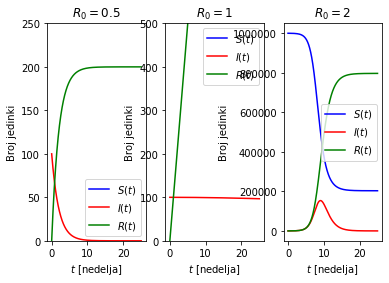

In [95]:
R0_arr = [0.5, 1, 2]

_, axis = plt.subplots(1, 3)
for i, R0 in enumerate(R0_arr):
    alpha = R0/N
    transponovano = np.transpose(odeint(SIR, [N - 100, 100, 0], t, (alpha, beta)))
    axis[i].plot(t, transponovano[0], label='$S(t)$', color='blue')
    axis[i].plot(t, transponovano[1], label='$I(t)$', color='red')
    axis[i].plot(t, transponovano[2], label='$R(t)$', color='green')
    axis[i].set_title(f'$R_0 = {R0}$')
    axis[i].set_xlabel('$t$ [nedelja]')
    axis[i].set_ylabel('Broj jedinki')
    axis[i].legend()

axis[0].set_ylim((0, 250))
axis[1].set_ylim((0, 500))

plt.show()

- Možemo reći da vrednosti $R_0$ veće od 1 dovode do epidemije.
- U slučaju endemije postoji prenošenje bolesti ali ostaje isti broj zaraženih.
- To se može proveriti preko $R(t)$ tako što vidimo da $R(t)$, odnosno broj izlečenih/umrlih/imunizovanih, raste, dok broj inficiranih stagnira, pa po tome zaključujemo da se bolest i dalje prenosi.

c) Naći maksimalan broj zaraženih tokom evolucije epidemije koja polazi iz stanja potpune podložnosti populacije (isti početni uslovi kao na početku zadatka), ukoliko je u pitanju širenje tri tipa virusa: influence (gripa) ($R_{0} = 3$), polia ($R_{0} = 6$) i rubeola ($R_{0} = 15$). Odgovarajuće sisteme jednačina rešavati na domenu od $0$ do $15$ nedelja. Priložiti dobijene vrednosti i nacrtati grafike vremenskih evolucija različitih kompartmana populacije $S(t)$ (plavom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku za pojedinačne slučajeve. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Svakoj slici pridružiti naziv virusa i odgovarajuću vrednost osnovnog reprodukcionog broja kao naslov grafika. Kako vrednost $R_{0}$ utiče na dinamiku epidemije?

Influenca maks. zaraženih: 300495
Polio maks. zaraženih: 534718
Rubeola maks. zaraženih: 752750


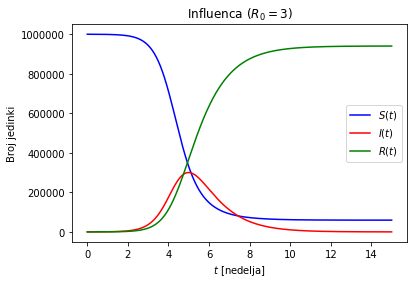

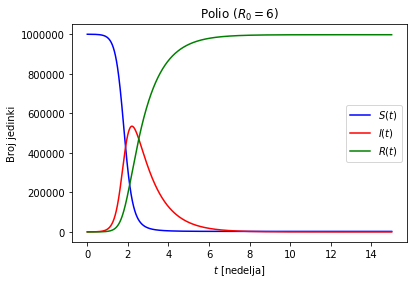

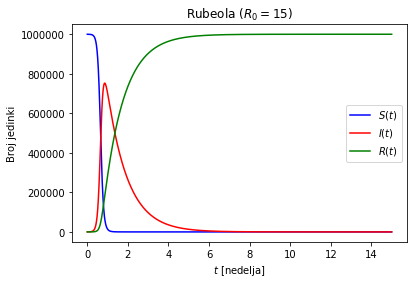

In [96]:
R0_arr = [(3, 'Influenca'), (6, 'Polio'), (15, 'Rubeola')]
t = np.linspace(0, 15, 2000)

for i, (R0, naziv) in enumerate(R0_arr):
    plt.figure(i)
    alpha = R0/N
    transponovano = np.transpose(odeint(SIR, [N - 100, 100, 0], t, (alpha, beta)))
    plt.plot(t, transponovano[0], label='$S(t)$', color='blue')
    plt.plot(t, transponovano[1], label='$I(t)$', color='red')
    plt.plot(t, transponovano[2], label='$R(t)$', color='green')
    plt.title(f'{naziv} ($R_0 = {R0}$)')
    plt.xlabel('$t$ [nedelja]')
    plt.ylabel('Broj jedinki')
    plt.legend()
    print(f'{naziv} maks. zaraženih: {int(np.max(transponovano[1]))}')

plt.show()

Maksimalni broj zaraženih se može naći u ispisu programa. Što je veće $R_0$ to je veći maksimalni broj zaraženih, epidemija ranije dostigne vrhunac i ranije završi.

d) Koje procentualne udele populacije jedinki je neophodno imunizovati da bi se sprečilo širenje virusa iz prethodne tačke u navedenoj izolovanoj populaciji? Hint: Videti slajd 20. Iskoristiti relaciju sa slajda za izračunavanje udela populacije u $\%$. Navesti dobijene vrednosti za svaki od virusa. 


In [97]:
# Izvršite kod da dobijete odgovor
for i, (R0, naziv) in enumerate(R0_arr):
    v = 1 - beta/R0
    print(f'{naziv}: {round(v * 100, 2)}%')

Influenca: 66.67%
Polio: 83.33%
Rubeola: 93.33%


***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: SIR model sa modelovanjem gubitka imuliteta - SIRS model

Modifikacijom SIR modela epidemije moguće je konstruisati SIRS model epidemije koji uključuje i mogućnost gubitka imuniteta jedinki, npr. usled mutacija virusa tokom epidemije. U tom slučaju, dodaje se još jedna konstanta brzine $\gamma$ koja opisuje gubitak imuniteta, i tada se sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane izražava na sledeći način:

\begin{align}
    \frac{dS}{dt} &= - \alpha SI + \gamma R\\
    \frac{dI}{dt} &= \alpha SI - \beta I\\
    \frac{dR}{dr} &= \beta I - \gamma R
\end{align}

gde je $S$ broj jedinki podložnih obolevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije, $\beta$ konstanta brzine oporavka i $\gamma$ konstanta brzine gubitka imuniteta. 


Na početku epidemije, $100$ jedinki zaraženih virusom SARS-CoV-2 ulazi u izolovanu podložnu populaciju od $10^6$ jedinki. Konstante brzine koje definišu širenje virusa su $\alpha = 2.65\times 10^{-6}$, $\beta = 1$ i $
\gamma= 0.35$ i definišu se na nedeljnoj (sedmičnoj) bazi. 


a)	Formirati Python definiciju (<font color='blue'>SIRS</font>) koja opisuje navedeni sistem diferencijalnih jednačina i zadati joj odgovarajuće pozivne parametre $\alpha$, $\beta$ i $\gamma$ kao argumente.

Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $30$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije. Nacrtati zavisnosti $S(t)$ (plavom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Koliko nedelja je potrebno da epidemija dostigne stacionarno stanje? Koji broj jedinki će ostati zaražen tokom stacionarnog stanja?

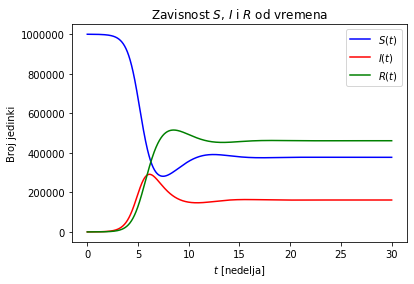

161417.34665626485


In [98]:
def SIRS(y, t, alpha, beta, gamma):
    S, I, R = y
    asi = alpha * S * I
    bi = beta * I
    gr = gamma * R
    return [-asi + gr, asi - bi, bi - gr]

t = np.linspace(0, 30, 2000)
alpha = 2.65e-6
gamma = 0.35

integrisano = odeint(SIRS, [N - 100, 100, 0], t, (alpha, beta, gamma))
transponovano = np.transpose(integrisano)
plt.title('Zavisnost $S$, $I$ i $R$ od vremena')
plt.xlabel('$t$ [nedelja]')
plt.ylabel('Broj jedinki')
plt.plot(t, transponovano[0], label='$S(t)$', color='blue')
plt.plot(t, transponovano[1], label='$I(t)$', color='red')
plt.plot(t, transponovano[2], label='$R(t)$', color='green')
plt.legend()
plt.show()

print(transponovano[1, -1])

- Potrebno je oko 15 nedelja da epidemija dostigne stacionarno stanje.
- Ostaće oko 160000 jedinki zaraženo u stacionarnom stanju.

b)	Variranjem vrednosti parametra $\gamma$ uočiti njegov uticaj na stabilizaciju broja zaraženih tokom evolucije epidemije. Kom fizičkom parametru vezanom za proces oscilacija približno odgovara parametar $\gamma$? Ukoliko je potrebno, obrazloženje potkrepiti graficima (ubaciti nove ćelije u Jupyter fajl).

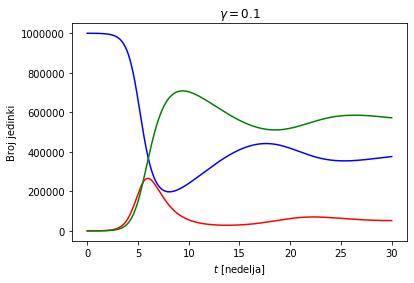

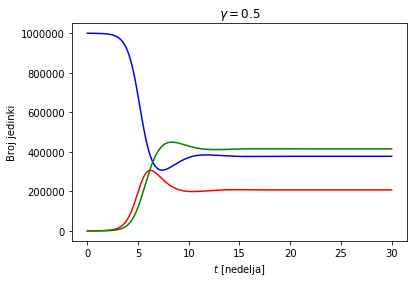

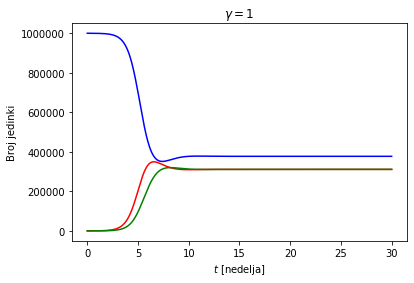

In [99]:
gamma_arr = [0.1, 0.5, 1]
for i, gamma in enumerate(gamma_arr):
    plt.figure(i)
    integrisano = np.transpose(odeint(SIRS, [N - 100, 100, 0], t, (alpha, beta, gamma)))
    plt.title(f'$\gamma = {gamma}$')
    plt.xlabel('$t$ [nedelja]')
    plt.ylabel('Broj jedinki')
    plt.plot(t, integrisano[0], label='$S(t)$', color='blue')
    plt.plot(t, integrisano[1], label='$I(t)$', color='red')
    plt.plot(t, integrisano[2], label='$R(t)$', color='green')

plt.show()

Veće vrednosti $\gamma$ dovode do bržeg ulaska u stacionarno stanje. $\gamma$ približno odgovara faktoru prigušenja $\alpha$ kod prigušenih oscilacija.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 3__: SIR model sa modelovanjem kontinualnog sprovođenja mera karantina - SIRQ model

Modifikacijom SIR modela epidemije moguće je konstruisati i SIRQ model epidemije koji uključuje mogućnost kontinualnog sprovođenja mera karantina nad određenim brojem zaraženih jedinki na nedeljnoj bazi tokom epidemije. Tada se sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane izražava na sledeći način:

\begin{align}
    \frac{dS}{dt} &= - \alpha SI\\
    \frac{dI}{dt} &= \alpha SI - (\beta + q)I\\
    \frac{dR}{dt} &= (\beta + q)I
\end{align}

gde je $S$ broj jedinki podložnih obolevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije, $\beta$ konstanta brzine oporavka i $q$ konstanta brzine uklanjanja zaraženih jedinki iz populacije putem preventivnih mera u vidu karantina.

Na početku epidemije, $100$ jedinki zaraženih virusom SARS-CoV-2 ulazi u izolovanu podložnu populaciju od $10^6$ jedinki. Konstante brzine koje definišu širenje virusa su $\alpha = 2.65\times 10^{-6}$, $\beta = 1$ i definišu se na nedeljnoj (sedmičnoj) bazi. 

a)	Formirati Python definiciju (<font color='blue'>SIRQ</font>) koja opisuje navedeni sistem diferencijalnih jednačina i zadati joj odgovarajuće pozivne parametre $\alpha$, $\beta$ i $q$ kao argumente. Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $30$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije za tri vrednosti konstante $q$ ($q = 0.1$, $q = 0.5$ i $q = 1$). Nacrtati zavisnosti $S(t)$ (plavom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Na osnovu analiza vremenskih evolucija epidemije, obrazložiti kako vrednost konstante brzine uklanjanja zaraženih jedinki iz populacije putem preventivnih mera u vidu karantina $q$ utiče na trajanje epidemije, maksimalan broj zaraženih jedinki tokom epidemije i vreme od početka epidemije kada broj zaraženih jedinki dostiže maksimum. Koji procenat jedinki u populaciji ostaje podložan tokom epidemija u analiziranim slučajevima?

Hint: Epidemija se može smatrati završenom u trenutku kada je $I < 0.5\%$ (nakon dostizanja maksimuma).

12.21%
28.55%
56.75%


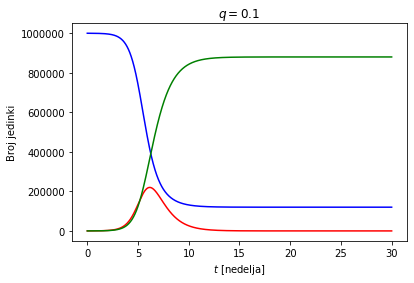

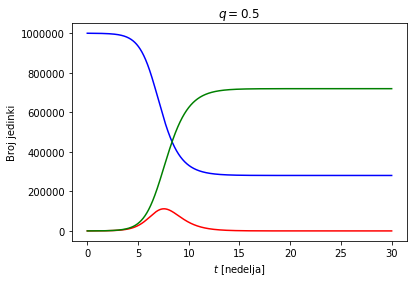

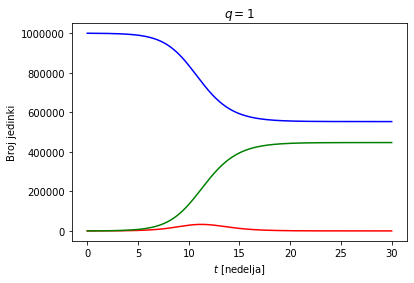

In [100]:
def SIRQ(y, t, alpha, beta, q):
    S, I, R = y
    asi = alpha * S * I
    bqi = (beta + q) * I
    return [-asi, asi - bqi, bqi]

q_arr = [0.1, 0.5, 1]
for i, q in enumerate(q_arr):
    plt.figure(i)
    integrisano = np.transpose(odeint(SIRQ, [N - 100, 100, 0], t, (alpha, beta, q)))
    plt.title(f'$q = {q}$')
    plt.xlabel('$t$ [nedelja]')
    plt.ylabel('Broj jedinki')
    plt.plot(t, integrisano[0], label='$S(t)$', color='blue')
    plt.plot(t, integrisano[1], label='$I(t)$', color='red')
    plt.plot(t, integrisano[2], label='$R(t)$', color='green')
    apsolutno = np.abs(integrisano[1] - 0.005 * N)
    max = np.where(apsolutno == np.max(apsolutno))[0][0]
    min = np.where(apsolutno[max:] == np.min(apsolutno[max:]))[0][0]
    print(f'{round(integrisano[0][min + max] / N * 100, 2)}%')

plt.show()

- Sa povećanjem $q$ povećavaju se trajanje epidemije i vreme od početka epidemije do kad $I$ dostigne maksimum a smanjuje se maksimalan broj zaraženih jedinki.
- 12.21%, 28.55% i 56.75% populacije ostaje podložno u svakom slučaju, redom.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 4__: SIR model sa modelovanjem prenosa informacija o epidemiji  - ISIR model

Modifikacijom SIR modela epidemije moguće je konstruisati i unapređeni ISIR model epidemije koji uključuje mogućnost prenosa informacija o epidemiji i preduzimanja osnovnih preventivnih mera od strane određenog broja podložnih jedinki na nedeljnoj bazi tokom epidemije. U ISIR modelu se smatra da se sa povećanjem broja zaraženih jedinki ubrzava širenje informacija o epidemiji i time pojačavaju osnovne preventivne mere, što se opisuje sledećom funkcijom:

\begin{equation}
    \alpha(I) = \frac{\alpha_{0}}{1 + kI}
\end{equation}

gde je $\alpha_{0}$ početna konstanta brzine infekcije, $I$ broj zaraženih jedinki, $k$ konstanta koja opisuje uticaj prenosa informacija o epidemiji i $\alpha(I)$ konstanta brzine infekcije koja zavisi od trenutne vrednosti $I$.  
Tada se sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane izražava na sledeći način:

\begin{align}
    \frac{dS}{dt} &= -\alpha(I) SI\\
    \frac{dI}{dt} &= \alpha(I) SI - \beta I\\
    \frac{dR}{dt} &= \beta I\\
\end{align}

gde je $S$ broj jedinki podložnih oboljevanju, $R$ broj uklonjenih jedinki i $\beta$ konstanta brzine oporavka.

Na početku epidemije, $100$ jedinki zaraženih virusom SARS-CoV-2 ulazi u izolovanu podložnu populaciju od $10^6$ jedinki. Od samog početka epidemije kreće se sa informisanjem populacije što se opisuje konstantom $k$ na nedeljnoj (sedmičnoj) bazi. Konstante brzine koje definišu širenje virusa bez preduzimanja preventivnih mera su $\alpha_{0} = 2.65\times 10^{-6}$ i $\beta = 1$ i takođe se definišu na nedeljnoj (sedmičnoj) bazi. 

a)	Formirati Python definiciju (<font color='blue'>ISIR</font>) koja opisuje navedeni sistem diferencijalnih jednačina i zadati joj odgovarajuće pozivne parametre $\alpha_0$, $\beta$ i $k$ kao argumente.

In [101]:
def ISIR(y, t, alpha0, beta, k):
    S, I, R = y
    asi = alpha0/(1 + k * I) * S * I
    bi = beta * I
    return [-asi, asi - bi, bi]

b) Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $30$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije za tri vrednosti konstante $k$ ($k = 0.3\times 10^{-5}$, $k = 0.8\times10^{-5}$ i $k = 1.7\times10^{-5}$). Nacrtati zavisnosti $S(t)$ (plavom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Na osnovu analiza vremenskih evolucija epidemije, obrazložiti kako vrednost konstante širenja informacija k utiče na trajanje epidemije, maksimalan broj zaraženih jedinki tokom epidemije i vreme od početka epidemije kada broj zaraženih jedinki dostiže maksimum. Koji procenat jedinki u populaciji ostaje podložan tokom epidemija u analiziranim slučajevima?

Hint: Epidemija se može smatrati završenom u trenutku kada je $I < 0.5\%$ (nakon dostizanja maksimuma).

19.42%
27.82%
34.64%


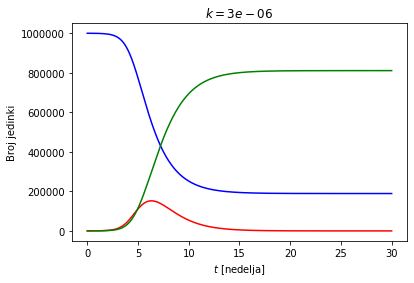

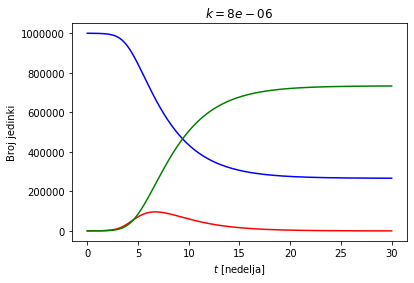

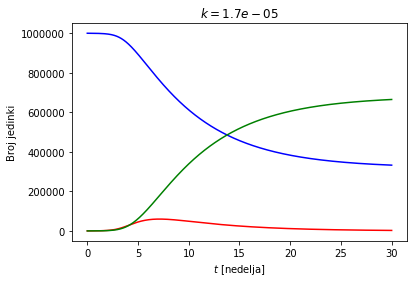

In [102]:
alpha0 = 2.65e-6

k_arr = [0.3e-5, 0.8e-5, 1.7e-5]
for i, k in enumerate(k_arr):
    plt.figure(i)
    integrisano = np.transpose(odeint(ISIR, [N - 100, 100, 0], t, (alpha0, beta, k)))
    plt.title(f'$k = {k}$')
    plt.xlabel('$t$ [nedelja]')
    plt.ylabel('Broj jedinki')
    plt.plot(t, integrisano[0], label='$S(t)$', color='blue')
    plt.plot(t, integrisano[1], label='$I(t)$', color='red')
    plt.plot(t, integrisano[2], label='$R(t)$', color='green')
    apsolutno = np.abs(integrisano[1] - 0.005 * N)
    max = np.where(apsolutno == np.max(apsolutno))[0][0]
    min = np.where(apsolutno[max:] == np.min(apsolutno[max:]))[0][0]
    print(f'{round(integrisano[0][min + max] / N * 100, 2)}%')

plt.show()

Sa povećanjem $k$ raste vreme do dostizanja maksimuma zaraženih i dužina trajanja epidemije a smanjuje se maksimalni broj zaraženih. Procenat jedinki koji ostaje podložan je 19.42%, 27.82% i 34.64%, redom.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 5__: SIR model sa modelovanjem efekta perioda inkubacije na širenje bolesti - SEIR model

Modifikacijom SIR modela epidemije moguće je konstruisati i kompleksniji SEIR model epidemije koji uračunava efekat perioda inkubacije na širenje bolesti. U tom slučaju se mora uvesti dodatni kompartman za izložene jedinke koje još uvek nisu postale infektivne i konstanta brzine prelaska jedinki iz izložene u zaraženu (infektivnu) populaciju. Tada se sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane proširuje i izražava na sledeći način:

\begin{align}
    \frac{dS}{dt} &= - \alpha SI\\
    \frac{dE}{dt} &= \alpha SI - \delta E\\
    \frac{dI}{dt} &= \delta E - \beta I\\
    \frac{dR}{dr} &= \beta I
\end{align}

gde je $S$ broj jedinki podložnih obolevanju, $E$ broj izloženih jedinki koje nisu infektivne, $I$ broj zaraženih jedinki koje su postale infektivne, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije,$\beta$ konstanta brzine oporavka i $\delta$ konstanta brzine prelaska jedinki iz izložene u zaraženu (infektivnu) populaciju.

Na početku epidemije, $100$ jedinki zaraženih virusom SARS-CoV-2 ulazi u izolovanu podložnu populaciju od $10^6$ jedinki. Konstante brzine koje definišu širenje virusa su $\alpha = 2.65\times 10^{-6}$, $\beta = 1$ i definišu se na nedeljnoj (sedmičnoj) bazi. 

a)	Formirati Python definiciju (<font color='blue'>SEIR</font>) koja opisuje navedeni sistem diferencijalnih jednačina i zadati joj odgovarajuće pozivne parametre $\alpha$, $\beta$ i $\delta$ kao argumente. Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $52$ nedelje sa početnim uslovima koji su naznačeni u opisu početka epidemije za tri vrednosti konstante $\delta$ ($\delta = 0.3$, $\delta = 0.5$ i $\delta = 1$). Nacrtati zavisnosti $S(t)$ (plavom bojom), $E(t)$ (žutom bojom), $I(t)$ (crvenom bojom) i $R(t)$ (zelenom bojom) na istom grafiku. Označiti ose grafika i identifikovati krive zavisnosti dodavanjem odgovarajuće legende. Na osnovu analiza vremenskih evolucija epidemije, obrazložiti kako vrednost konstante brzine prelaska jedinki iz izložene u zaraženu (infektivnu) populaciju $\delta$ utiče na trajanje epidemije, maksimalan broj obolelih jedinki tokom epidemije (infektivnih i neinfektivnih) i vreme od početka epidemije kada broj obolelih jedinki dostiže maksimum u izloženoj i zaraženoj populaciji. Koji procenat jedinki u populaciji ostaje podložan tokom epidemija u analiziranim slučajevima? Uporediti karakteristike maksimuma krivih $E(t)$ i $I(t)$ i objasniti njihovu međusobnu vezu.

Hint: Epidemija se može smatrati završenom u trenutku kada je $I < 0.5$ (nakon dostizanja maksimuma).


9.55%
9.34%
9.19%


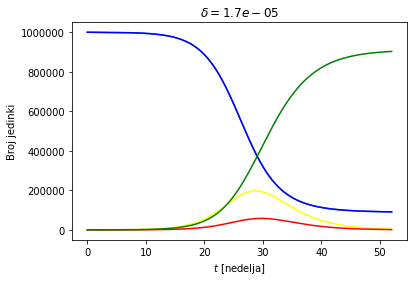

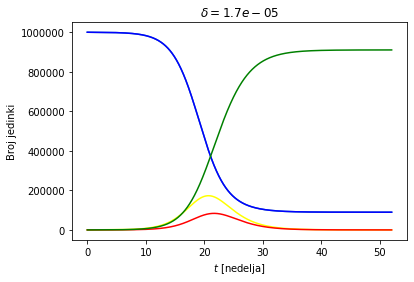

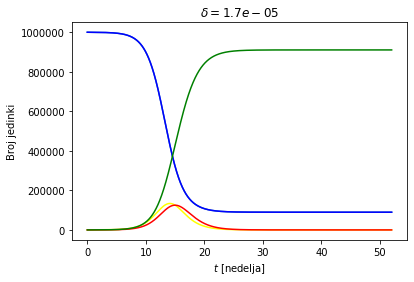

In [103]:
def SEIR(y, t, alpha, beta, delta):
    S, E, I, R = y
    asi = alpha * S * I
    de = delta * E
    bi = beta * I
    return [-asi, asi - de, de - bi, bi]

t = np.linspace(0, 52, 2000)
delta_arr = [0.3, 0.5, 1]
for i, delta in enumerate(delta_arr):
    plt.figure(i)
    integrisano = np.transpose(odeint(SEIR, [N - 100, 0, 100, 0], t, (alpha, beta, delta)))
    plt.title(f'$\delta = {k}$')
    plt.plot(t, integrisano[0])
    plt.xlabel('$t$ [nedelja]')
    plt.ylabel('Broj jedinki')
    plt.plot(t, integrisano[0], label='$S(t)$', color='blue')
    plt.plot(t, integrisano[1], label='$E(t)$', color='yellow')
    plt.plot(t, integrisano[2], label='$I(t)$', color='red')
    plt.plot(t, integrisano[3], label='$R(t)$', color='green')
    apsolutno = np.abs(integrisano[2] - 0.005 * N)
    max = np.where(apsolutno == np.max(apsolutno))[0][0]
    min = np.where(apsolutno[max:] == np.min(apsolutno[max:]))[0][0]
    print(f'{round(integrisano[0][min + max] / N * 100, 2)}%')

plt.show()

- Sa povećanjem $\delta$ raste trajanje epidemije i maksimalan broj obolelih infektivnih jedinki a smanjuje se maksimalan broj obolelih neinfektivnih jedinki i vreme dok broj obolelih dostigne maksimum.
- Koji procenat jedinki u populaciji koji ostaje podložan tokom epidemija u analiziranim slučajevima je 9.55%, 9.34% i 9.19%, redom.
- Što je veće $\delta$, to je veća brzina prelaska iz inkubacionog perioda u infektivni period, pa zato maksimum infektivnih jedinki raste s povećanjem $\delta$ dok se maksimum neinfektivnih jedinki smanjuje.